<a href="https://colab.research.google.com/github/JG-dot/Exploratory-Data-Analysis/blob/main/EDA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Missing values:
 Pregnancies                 1
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         0
Outcome                     3
dtype: int64

Skewness of numerical columns:
 Pregnancies                 0.901447
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919145
Age                         1.129597
Outcome                     0.635977
dtype: float64

Quantiles:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0.25          1.0    99.00           62.0            0.0     0.00  27.3   
0.50          3.0   117.00           72.0           23.0    30.50  32.0   
0.75          6.0   140.25           80.0           32.0   127.25  36.6   

    

/tmp/ipython-input-3111341210.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette="pastel")


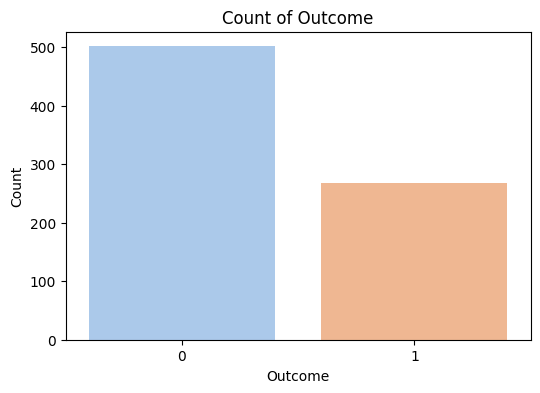

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.cluster import KMeans

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/diabetes.csv"
df = pd.read_csv(url)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Fill missing values
df.fillna(df.mean(), inplace=True)

# 1D ANALYSIS
print("\nSkewness of numerical columns:\n", df.skew(numeric_only=True))

print("\nQuantiles:\n", df.quantile([0.25, 0.5, 0.75]))

print("\nFrequency distribution of Outcome:\n", df['Outcome'].value_counts())


# CategoricaL Variable Analysis
df['Outcome'] = df['Outcome'].astype(int)
print("\nValue counts for Outcome:")
print(df['Outcome'].value_counts())

# Bar plot for Outcome
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette="pastel")
plt.title("Count of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


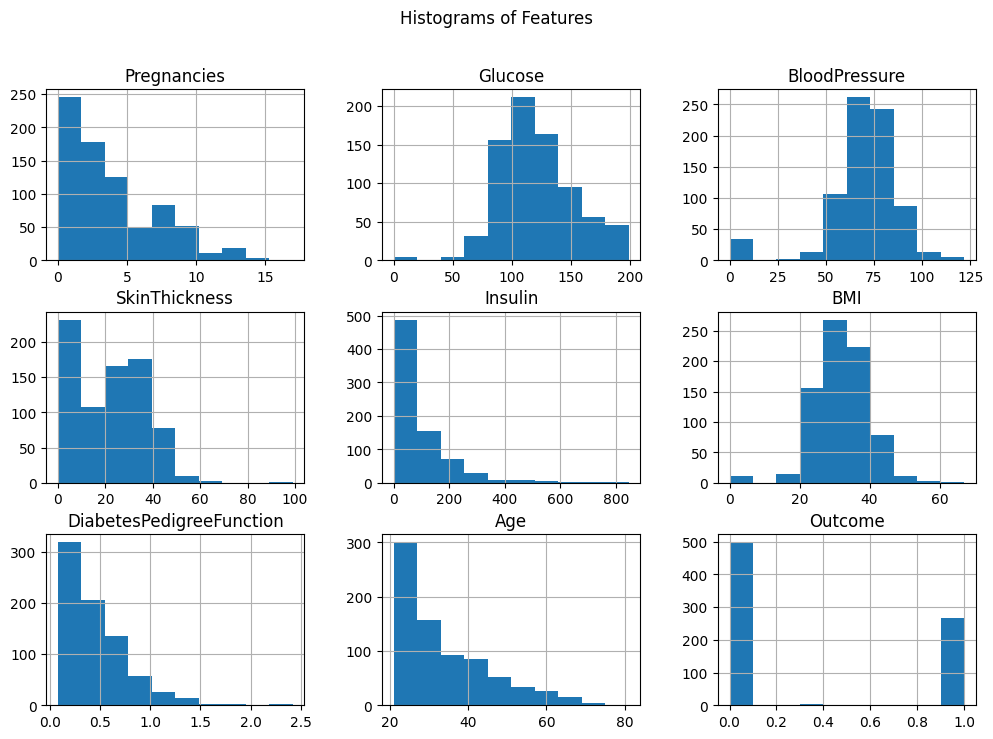

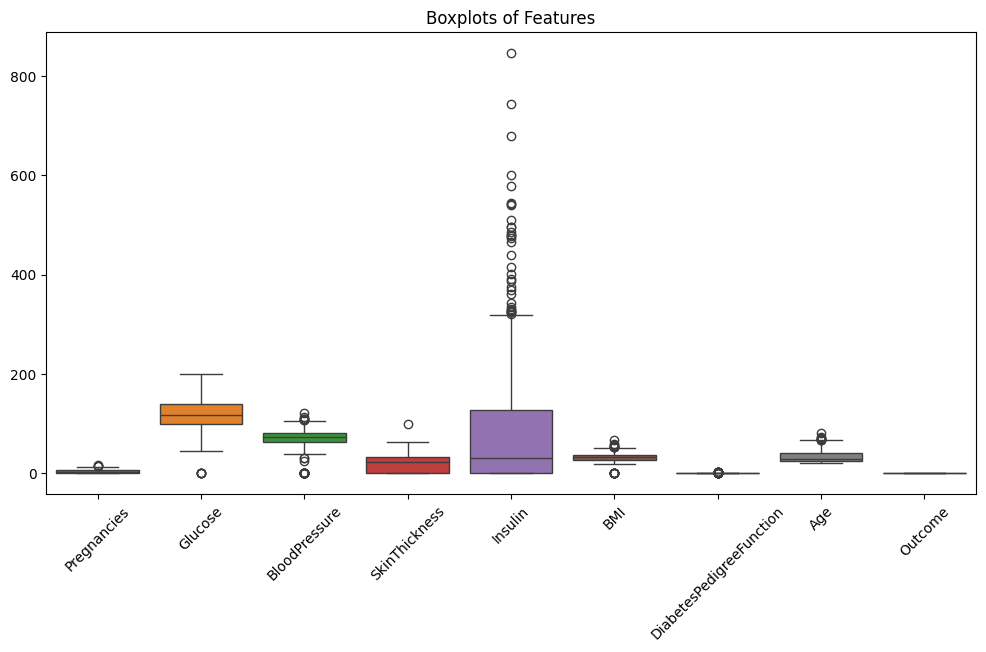

In [49]:
# Histograms
df.hist(figsize=(12,8))
plt.suptitle("Histograms of Features")
plt.show()

# Boxplots for all features
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()


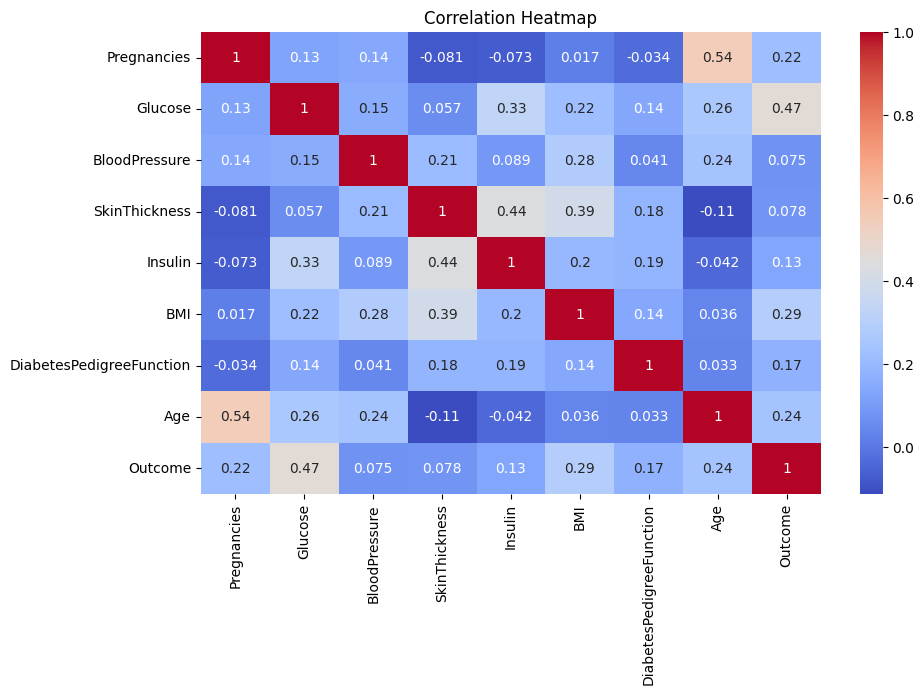

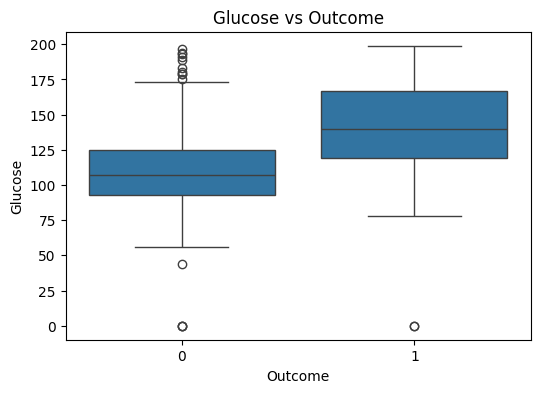

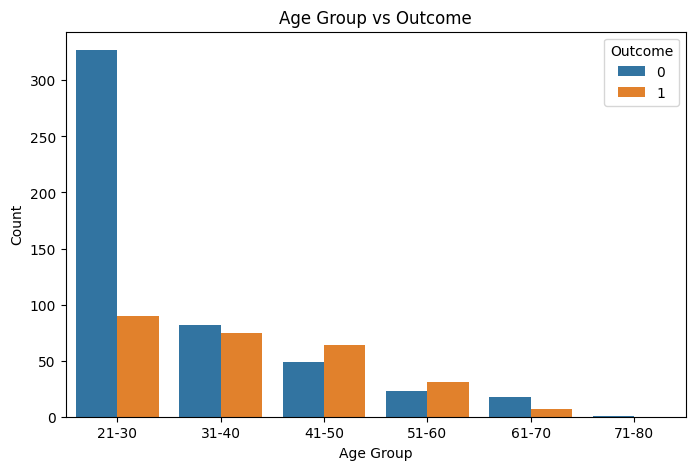

In [54]:

# 2D ANALYSIS
df['Outcome'] = df['Outcome'].astype(int)

# Numerical vs Numerical
plt.figure(figsize=(10,6))
numerical_cols = df.select_dtypes(include='number').columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Numerical vs Categorical
plt.figure(figsize=(6,4))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Outcome")
plt.show()

# Categorical vs Categorical
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80],
                        labels=['21-30','31-40','41-50','51-60','61-70','71-80'])

plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='Outcome', data=df)
plt.title("Age Group vs Outcome")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()



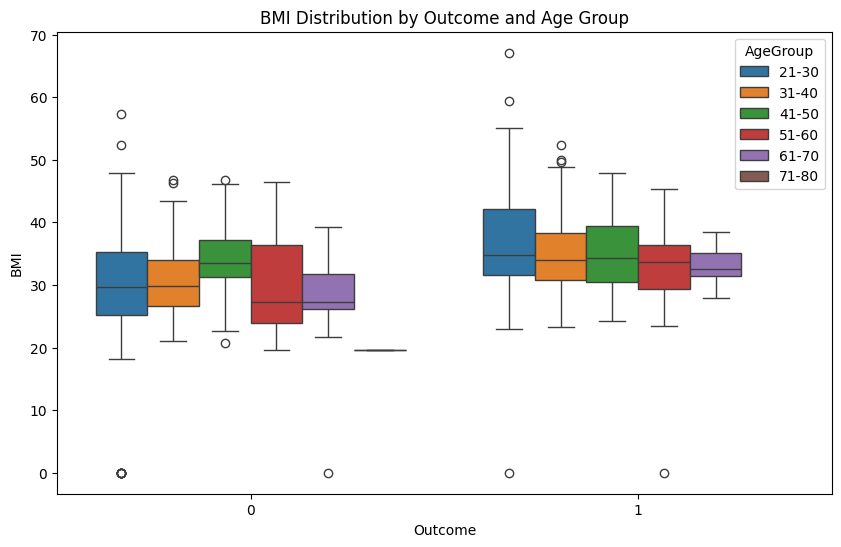

In [55]:
# 3D ANALYSIS

plt.figure(figsize=(10,6))
sns.boxplot(x="Outcome", y="BMI", hue="AgeGroup", data=df)
plt.title("BMI Distribution by Outcome and Age Group")
plt.show()




Cluster Centers (Glucose, BMI):
 [[102.91828794  30.76634241]
 [157.27165354  34.47401575]]


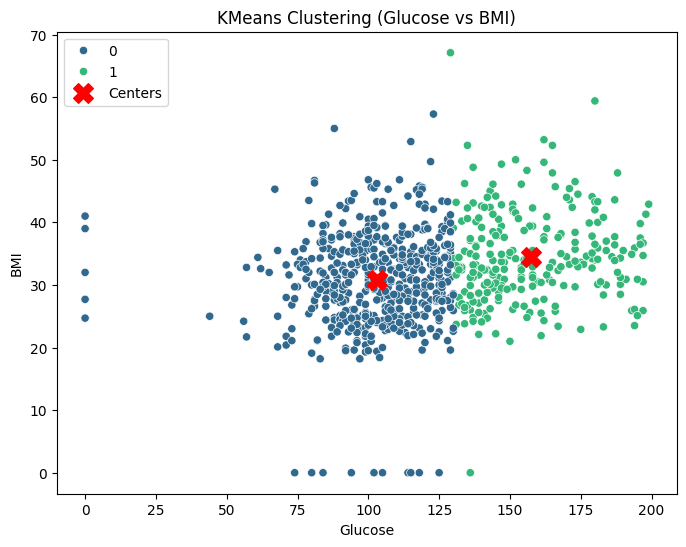

In [58]:
# CLUSTERING
# Features for clustering
X_2d = df[['Glucose', 'BMI']]

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_2d)

# Print cluster centers
print("\nCluster Centers (Glucose, BMI):\n", kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Glucose", y="BMI", hue="Cluster", data=df, palette="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centers')
plt.title("KMeans Clustering (Glucose vs BMI)")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.show()